<a href="https://colab.research.google.com/github/ZhoomartSuranbaev/nlp-preprocessing-and-ngram-analysis/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📝 1. Import Libraries and Download NLTK Resources**

This section imports all required libraries for text preprocessing, tokenization, lemmatization, and n-gram analysis.
We also download necessary NLTK resources such as tokenizers, stopwords, and the WordNet lemmatizer.

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=2188615d6f5b45b3d696ef64598e3f8b386dd86be3da0c227cef3e0df009c772
  Stored in directory: /root/.cache/pip/wheels/63/47/7c/a9688349aa74d228ce0a9023229c6c0ac52ca2a40fe87679b8
Successfully built wikipedia


# 🌐 2. **Scrape Raw Text from Wikipedia**

Here we use the wikipedia Python package to extract raw article content.
We collect three articles and split them into individual sentences for further processing.

In [3]:
import wikipedia

wikipedia.set_lang("en")

pages = ["Artificial intelligence", "Machine learning", "Data science"]

all_sentences = []
for title in pages:
    try:
        page = wikipedia.page(title, auto_suggest=False)
        text = page.content
        sentences = text.split(". ")
        all_sentences.extend(sentences)
    except Exception as e:
        print(f"Ошибка с {title}: {e}")

df = pd.DataFrame(all_sentences, columns=["text"])
print(df.head())


                                                text
0  Artificial intelligence (AI) is the capability...
1  It is a field of research in computer science ...
2  However, many AI applications are not perceive...
3  The traditional goals of AI research include l...
4  To reach these goals, AI researchers have adap...


# 🧹 **3. Text Cleaning and Preprocessing**

This function performs the following steps:
*   Lowercasing
*   Removing punctuation
*   Removing digits
*   Tokenization
*   Stopword removal
*   Lemmatization



In [29]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()                     # lower
    text = re.sub(r'[^\w\s]', '', text)     # remove punctuation
    text = re.sub(r'\d+', '', text)         # remove numbers

    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]  # stopwords
    tokens = [lemmatizer.lemmatize(w) for w in tokens]   # lemmatization

    return tokens

# **🧪 4. Apply Preprocessing to the Dataset**

We add a new column clean_tokens containing the cleaned list of tokens for each sentence.

In [30]:
df["clean_tokens"] = df["text"].apply(clean_text)
df

,text,clean_tokens
0,Artificial intelligence (AI) is the capability...,"[artificial, intelligence, ai, capability, com..."
1,It is a field of research in computer science ...,"[field, research, computer, science, develops,..."
2,"However, many AI applications are not perceive...","[however, many, ai, application, perceived, ai..."
3,The traditional goals of AI research include l...,"[traditional, goal, ai, research, include, lea..."
4,"To reach these goals, AI researchers have adap...","[reach, goal, ai, researcher, adapted, integra..."
...,...,...
473,The goal of this method is to help students un...,"[goal, method, help, student, understand, data..."
474,\nMachine learning models can amplify existing...,"[machine, learning, model, amplify, existing, ..."
475,Citing datasets makes it easier for other rese...,"[citing, datasets, make, easier, researcher, u..."
476,These practices give the people who collect an...,"[practice, give, people, collect, manage, data..."


# **🔠 5. Function to Generate N-grams**

This function extracts unigrams, bigrams, and trigrams from tokenized text.

In [31]:
def get_ngrams(tokens_list, n):
    ngrams = []
    for tokens in tokens_list:
        for i in range(len(tokens)-n+1):
            ngrams.append(tuple(tokens[i:i+n]))
    return ngrams


# **📊 6. Extract Unigrams, Bigrams and Trigrams**
We compute the most frequent n-grams using the Counter class.

In [32]:
unigrams = get_ngrams(df["clean_tokens"], 1)
bigrams = get_ngrams(df["clean_tokens"], 2)
trigrams = get_ngrams(df["clean_tokens"], 3)

print("Top Unigrams:", Counter(unigrams).most_common(10))
print("Top Bigrams:", Counter(bigrams).most_common(10))
print("Top Trigrams:", Counter(trigrams).most_common(10))

Top Unigrams: [(('ai',), 239), (('data',), 139), (('intelligence',), 88), (('learning',), 68), (('problem',), 66), (('science',), 65), (('used',), 64), (('artificial',), 63), (('machine',), 62), (('human',), 47)]
Top Bigrams: [(('artificial', 'intelligence'), 46), (('data', 'science'), 39), (('neural', 'network'), 27), (('machine', 'learning'), 23), (('deep', 'learning'), 15), (('ai', 'research'), 14), (('data', 'center'), 13), (('general', 'intelligence'), 10), (('data', 'analysis'), 10), (('generative', 'ai'), 9)]
Top Trigrams: [(('artificial', 'general', 'intelligence'), 6), (('artificial', 'neural', 'network'), 5), (('natural', 'language', 'processing'), 4), (('large', 'language', 'model'), 4), (('machine', 'learning', 'model'), 4), (('graphic', 'processing', 'unit'), 3), (('early', 'ai', 'research'), 3), (('solve', 'problem', 'using'), 3), (('generative', 'pretrained', 'transformer'), 3), (('state', 'space', 'search'), 3)]


# **📈 7. Visualization — Top 10 Unigrams**

A bar chart displaying the most frequent single-word tokens.

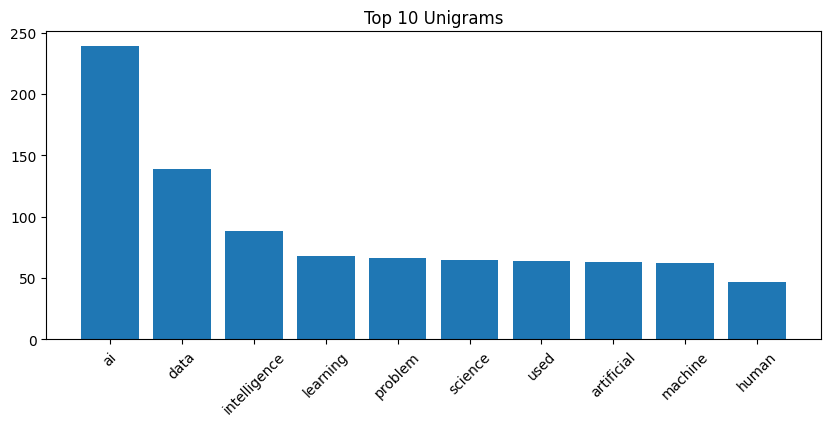

In [33]:
uni_counts = Counter(unigrams).most_common(10)
labels = [' '.join(u[0]) for u in uni_counts]
values = [u[1] for u in uni_counts]

plt.figure(figsize=(10,4))
plt.bar(labels, values)
plt.title("Top 10 Unigrams")
plt.xticks(rotation=45)
plt.show()

# **📈 8. Visualization — Top 10 Bigrams**

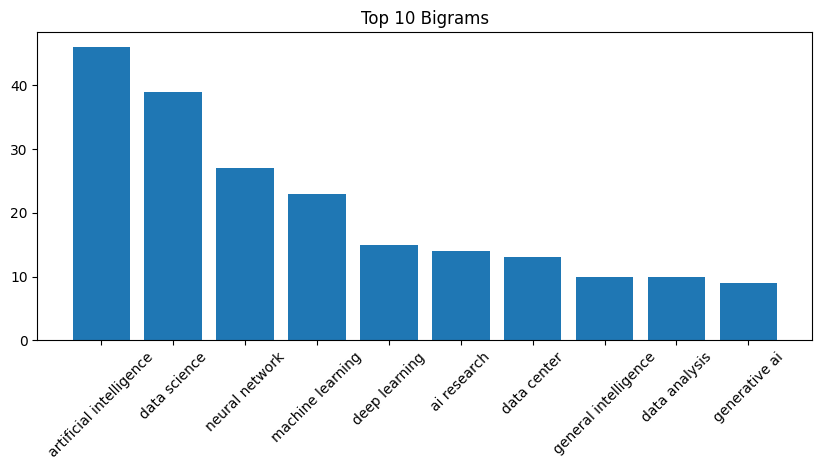

In [34]:
bi_counts = Counter(bigrams).most_common(10)
labels = [' '.join(b[0]) for b in bi_counts]
values = [b[1] for b in bi_counts]

plt.figure(figsize=(10,4))
plt.bar(labels, values)
plt.title("Top 10 Bigrams")
plt.xticks(rotation=45)
plt.show()

# **📈 9. Visualization — Top 10 Trigrams**

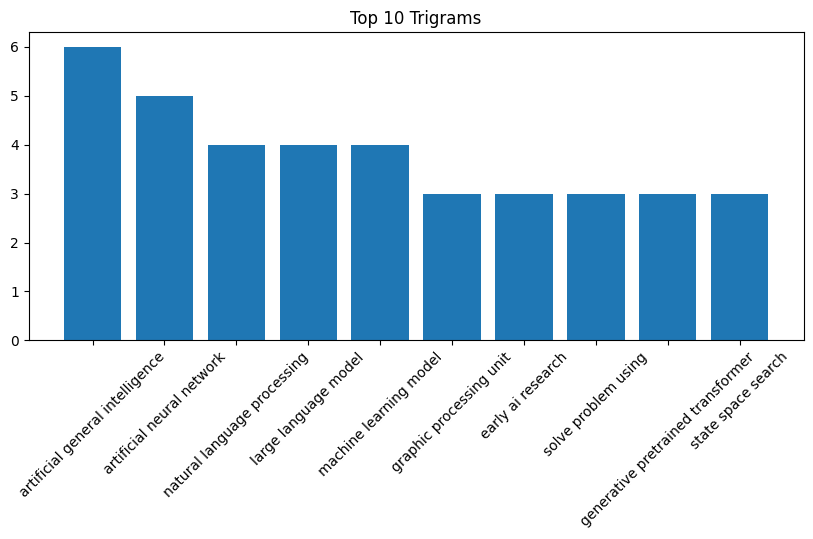

In [35]:
tri_counts = Counter(trigrams).most_common(10)
labels = [' '.join(t[0]) for t in tri_counts]
values = [t[1] for t in tri_counts]

plt.figure(figsize=(10,4))
plt.bar(labels, values)
plt.title("Top 10 Trigrams")
plt.xticks(rotation=45)
plt.show()